<a href="https://colab.research.google.com/github/iparinile/ML_learning/blob/master/Learning_ml_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install mglearn
import mglearn  

# импортируем необходимые модули
import numpy as np
import pandas as pd

# чтобы строить графики прямо в ноутбуке
import matplotlib.pyplot as plt  
%matplotlib inline

# линейные модели
from sklearn.linear_model import LinearRegression

# раздение выборки на обучающую и тестовую
from sklearn.model_selection import train_test_split

     |████████████████████████████████| 542kB 9.1MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.7-py2.py3-none-any.whl size=582705 sha256=ce5e7e5de7a365d930f5651ad9f64b72b9d7a72f79d5d3e701eafbcaedc83b50
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving data.csv to data.csv
User uploaded file "data.csv" with length 1753 bytes


In [0]:
data = pd.read_csv('data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 7 columns):
time        28 non-null object
weight      28 non-null object
height      28 non-null int64
age         28 non-null int64
foot        28 non-null int64
year        28 non-null int64
district    28 non-null object
dtypes: int64(4), object(3)
memory usage: 1.6+ KB


In [0]:
data.drop([3], inplace=True)

In [0]:
data

,time,weight,height,age,foot,year,district
0,15.08.2018 11:11:11,68.0,183,34,43.0,1983,Курчатовский
1,15.08.2018 11:36:33,71.0,181,16,43.0,2001,Центральный
2,15.08.2018 13:24:25,60.0,175,17,42.0,2001,Центральный
4,15.08.2018 15:55:30,58.0,173,19,39.0,1999,Центральный
5,16.08.2018 9:51:42,53.0,170,14,44.0,2004,Другой
6,16.08.2018 17:55:15,60.0,172,17,41.0,2001,Центральный
7,16.08.2018 17:57:12,64.0,178,19,42.0,1999,Курчатовский
8,16.08.2018 20:06:37,70.0,181,18,43.0,1999,Центральный
9,16.08.2018 23:16:57,65.0,178,17,42.0,2001,Калининский
10,16.08.2018 23:53:27,60.0,180,16,42.0,2001,Советский


In [0]:
data['weight'] = data['weight'].replace('56,4', '56.4')
data[['foot', 'weight']] = data[['foot', 'weight']].astype('float64')

data.info()

x = data[['height', 'age', 'foot']]
y = data['weight']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 27
Data columns (total 7 columns):
time        27 non-null object
weight      27 non-null float64
height      27 non-null int64
age         27 non-null int64
foot        27 non-null float64
year        27 non-null int64
district    27 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 1.7+ KB


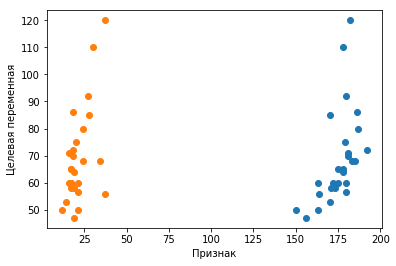

In [0]:
plt.plot(x, y, 'o')
plt.xlabel("Признак")
plt.ylabel("Целевая переменная")
plt.show()

In [0]:
# разделим на train и test в дефолтных пропорциях
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)

# создадим модель
lr = LinearRegression()
# и обучим ее
lr.fit(X_train, y_train)

# предскажем значения для тестовой выборки
y_pred = lr.predict(X_test)

In [0]:
# чтобы посчитать стандартные метрики - импортируем их
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Средне-квадратичная ошибка
print("Mean squared error: {:.2f}".format(
    mean_squared_error(y_test, y_pred)))

# Средняя абсолютная ошибка
print("Mean absolute error: {:.2f}".format(
    mean_absolute_error(y_test, y_pred)))

Mean squared error: 210.65
Mean absolute error: 11.64


In [0]:
# попробуем боевое предсказание
x_ = input('Введите Х:')
x_ = [[float(x_)]]
# print(type(x_), x_)

y_ = lr.predict(x_)

print(type(y_), y_)

print('Предсказанный у = {:0.2f}'.format(y_[0]))

Введите Х:192


ValueError: ignored

In [0]:
# посмотрим как выглядит уравнение прямой, которой обучилась модель
print('Уравнение прямой:  y = {:.3} + X*{:.4} \n\n'.format(lr.intercept_, lr.coef_[0]))
X_line = [140, 200]
y_line = X_line * lr.coef_ + lr.intercept_


plt.scatter(X_train, y_train,  color='black')  # черным - точки, которые видела модель
plt.scatter(X_test, y_test,  color='red')  # красным - тестовая выборка
plt.plot(X_line, y_line, color='blue', linewidth=3)  # модель - голубая линия


plt.xlabel("Признак")
plt.ylabel("Целевая переменная")
plt.show()

Уравнение прямой:  y = -1.34e+02 + X*0.8055 




ValueError: ignored